In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


AttributeError: module 'tensorflow' has no attribute 'compat'

In [72]:
X = np.load('images.npy')
y = np.load('cats.npy')

print(X.shape)
print(y.shape)


(900, 224, 224, 3)
(900,)


In [73]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [75]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [76]:
# tranform the image categories to one hot binary matrix for each category
y_train = to_categorical(y_train, num_classes=3, dtype='float32')
# tranform the image categories to one hot binary matrix for each category
y_test = to_categorical(y_test, num_classes=3, dtype='float32')

In [77]:
# split the training data into a training set and a validation set
X_train, X_valid = X_train[:-200], X_train[-200:]
y_train, y_valid = y_train[:-200], y_train[-200:]

In [78]:
# create the MLP model
inputs = Input(shape=(224,224,3))

conv2D_1 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(inputs)
maxPool_1 = MaxPooling2D(pool_size=2,strides=2)(conv2D_1)
batch_1 = BatchNormalization()(maxPool_1)


conv2D_2 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(batch_1)
maxPool_2 = MaxPooling2D(pool_size=2,strides=1)(conv2D_2)
batch_2 = BatchNormalization()(maxPool_2)

conv2D_3 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(batch_2)
maxPool_3 = MaxPooling2D(pool_size=2,strides=1)(conv2D_3)
batch_3 = BatchNormalization()(maxPool_3)

conv2D_4 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(batch_3)
maxPool_4 = MaxPooling2D(pool_size=2,strides=1)(conv2D_4)
batch_4 = BatchNormalization()(maxPool_4)


flat = Flatten()(batch_4)
dense_1 = Dense(units=64,activation='relu')(flat)
outputs = Dense(units=3,activation='softmax')(dense_1)

model = keras.Model(inputs,outputs)


In [79]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 222, 222, 15)      420       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 15)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 111, 111, 15)      60        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 15)      2040      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 108, 108, 15)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 108, 108, 15)      60  

In [80]:
# comile the model unsing categorical_crossentropy loss function
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
# train the model using a mini batch size of 100 images and 50 epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=100,validation_data=[X_valid, y_valid])

Epoch 1/100
7/7 [==============================] - 27s 4s/step - loss: 10.9674 - accuracy: 0.7639 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 26s 4s/step - loss: 0.0249 - accuracy: 0.9934 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 27s 4s/step - loss: 0.0061 - accuracy: 0.9967 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 27s 4s/step - loss: 1.4522e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 27s 4s/step - loss: 1.3433e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 27s 4s/step - loss: 1.1056e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 28s 4s/step - loss: 1.0337e-04 - accuracy: 1.0000 - va

7/7 [==============================] - 27s 4s/step - loss: 4.9872e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 56/100
7/7 [==============================] - 27s 4s/step - loss: 1.0183e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 57/100
7/7 [==============================] - 27s 4s/step - loss: 6.7929e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 58/100
7/7 [==============================] - 27s 4s/step - loss: 8.2699e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 59/100
7/7 [==============================] - 27s 4s/step - loss: 4.2036e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 60/100
7/7 [==============================] - 27s 4s/step - loss: 4.1586e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 61/100
7/7 [==============================] - 27s 4s/step - loss: 2.8278e-07 - accuracy: 1.0000

In [82]:
# evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=100)
print('test loss, test acc:', results)


# Evaluate on test data
1/1 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
test loss, test acc: [0.001858976436778903, 1.0]


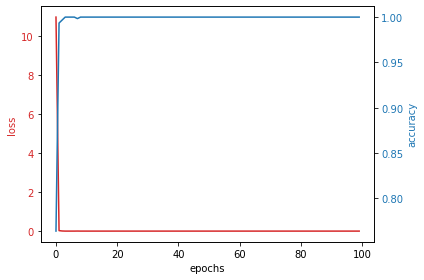

In [83]:
# summarize history for accuracy and loss as a function of the epochs
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(history.history['loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['accuracy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [84]:
y_pred = model.predict(X_test)

In [85]:
for i in range(len(y_test)):
    
    print('Actual : '+ str(y_test[i])+' -- Pres : '+str(y_pred[i]))

Actual : [1. 0. 0.] -- Pres : [1. 0. 0.]
Actual : [0. 1. 0.] -- Pres : [1.7912959e-37 9.9999988e-01 1.7731200e-07]
Actual : [1. 0. 0.] -- Pres : [1.0000000e+00 2.0406487e-16 1.5916772e-19]
Actual : [0. 0. 1.] -- Pres : [5.2900296e-32 5.9352421e-09 1.0000000e+00]
Actual : [1. 0. 0.] -- Pres : [1.000000e+00 6.981111e-20 7.547912e-22]
Actual : [0. 1. 0.] -- Pres : [0.00000000e+00 1.00000000e+00 1.06061595e-14]
Actual : [1. 0. 0.] -- Pres : [1.0000000e+00 0.0000000e+00 1.7646712e-19]
Actual : [1. 0. 0.] -- Pres : [1.0000000e+00 1.2659206e-34 3.6771229e-32]
Actual : [1. 0. 0.] -- Pres : [1.0000000e+00 0.0000000e+00 4.2807818e-38]
Actual : [1. 0. 0.] -- Pres : [1.0000000e+00 0.0000000e+00 2.5707667e-34]
Actual : [1. 0. 0.] -- Pres : [1. 0. 0.]
Actual : [0. 0. 1.] -- Pres : [2.8555724e-29 2.5788509e-06 9.9999738e-01]
Actual : [0. 1. 0.] -- Pres : [1.5239128e-35 1.0000000e+00 2.9915709e-11]
Actual : [1. 0. 0.] -- Pres : [1.0000000e+00 7.9885846e-24 7.9807788e-26]
Actual : [0. 1. 0.] -- Pres : 